# 알렉스 넷 만들기

In [ ]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

# 유클리디언 거리 L2
from keras.regularizers import l2
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
l2_reg = 0.4
batch_size = 32
num_classes = 10
data_augmentation = True
num_predictions = 20

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
# 원래는 강의 자료에 num_classes 필요없다 왜 12개의 클래스로 굳이 만든 걸까?? 오타였다~~ 10이 맞음
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 12) (10000, 12)


In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 12) (10000, 12)


In [ ]:
X_train.shape[1:]

(32, 32, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(96, (11, 11), input_shape=X_train.shape[1:],padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(256, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3, 3),
padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3, 3),
padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adadelta', metrics =['accuracy'])

In [ ]:
# 컴벌류션을 5개 구성하다 보니 오래 걸림
history = model.fit(X_train, y_train,
batch_size=batch_size,
epochs=10,
verbose=1,
validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions = model.predict(X_test, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 83s 50ms/step - loss: 4.6160 - accuracy: 0.2158 - val_loss: 4.1802 - val_accuracy: 0.3820
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 4.2865 - accuracy: 0.3094 - val_loss: 4.0203 - val_accuracy: 0.4262
Epoch 3/10
1563/1563 [==============================] - 82s 53ms/step - loss: 4.1208 - accuracy: 0.3545 - val_loss: 3.8877 - val_accuracy: 0.4539
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 3.9873 - accuracy: 0.3883 - val_loss: 3.7764 - val_accuracy: 0.4785
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 3.8702 - accuracy: 0.4120 - val_loss: 3.6703 - val_accuracy: 0.4937
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 3.7656 - accuracy: 0.4336 - val_loss: 3.5822 - val_accuracy: 0.5068
Epoch 7/10
1563/1563 [==============================] - 82s 53ms/step - loss: 3.6685 - accuracy: 0.4530 - val_loss: 3.4911 -

In [ ]:
def load_label_names():
  return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_image_predictions(features, labels, predictions):
  n_classes = 10
  label_names = load_label_names()
  label_binarizer = LabelBinarizer()
  label_binarizer.fit(range(n_classes))
  label_ids = label_binarizer.inverse_transform(np.array(labels))
  fig, axs = plt.subplots(10, 2, figsize=(12,24))
  margin = 0.05
  ind = np.arange(n_classes)
  width = (1. - 2. * margin) / n_classes
  arr_features = [None]*10
  arr_predictions = np.zeros((10, 10))
  last_image_i = 0

  for i, prediction in enumerate(predictions):
    label_id = label_ids[i]
    feature = features[i]
    arr_features[label_id] = feature
    max_id = np.argmax(prediction)
    arr_predictions[label_id][max_id] += 1
    last_image_i = i
  arr_predictions /= last_image_i

  for i in range(10):
    feature = arr_features[i]
    pred_name = label_names[i]
    prediction = arr_predictions[i]
    axs[i][0].imshow(feature)
    axs[i][0].set_title(pred_name)
    axs[i][0].set_axis_off()
    axs[i][1].barh(ind + margin, prediction, width)
    axs[i][1].set_yticks(ind + margin)
    axs[i][1].set_yticklabels(label_names)
  plt.tight_layout()

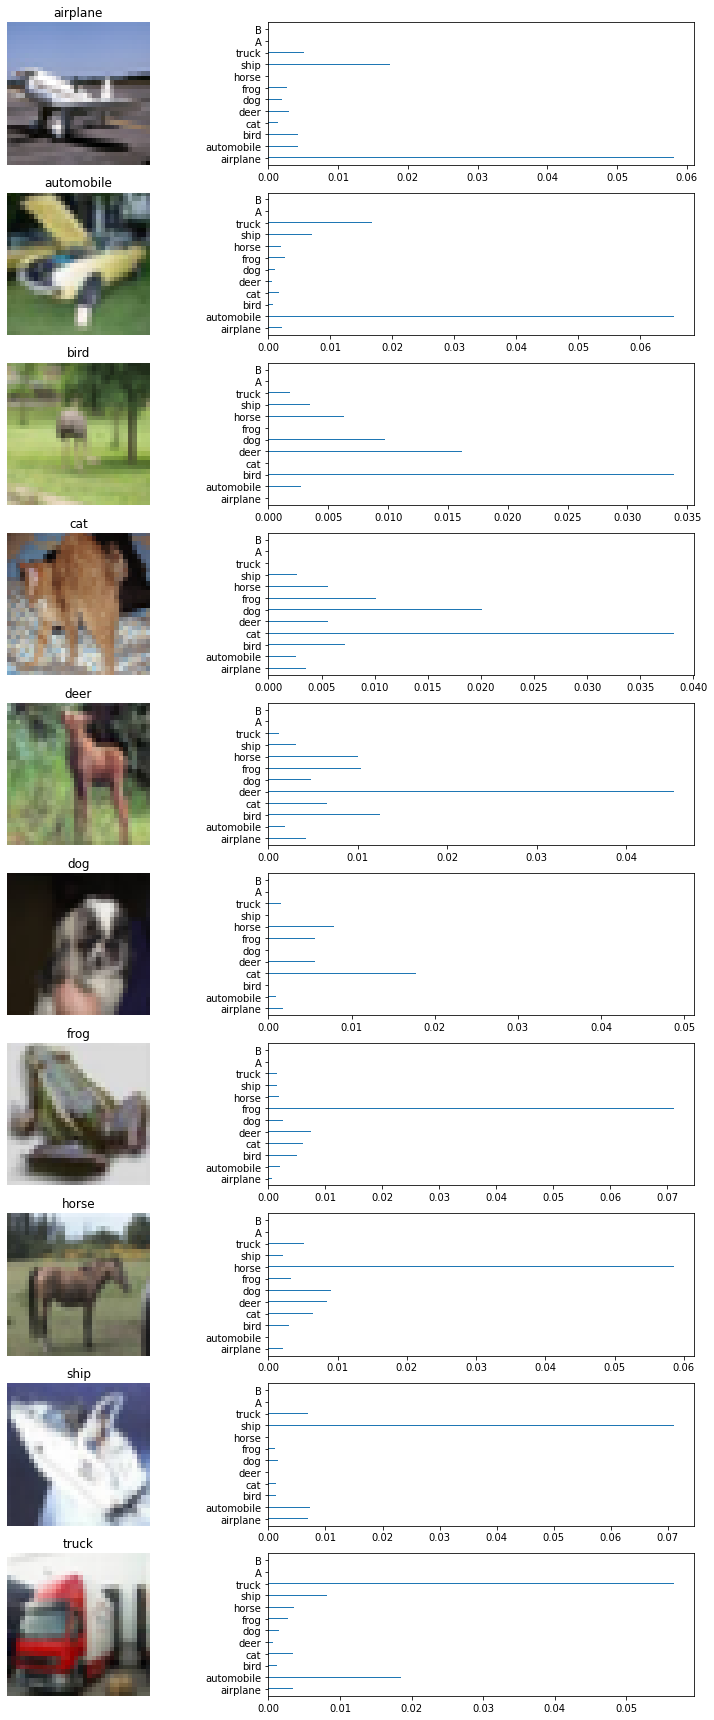

In [ ]:
display_image_predictions(X_test, y_test, predictions)

# vgg 라이브러리 그대로 공짜로 쓰기 ㅎㅎ

In [ ]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [ ]:
# VGG16 모델 
# ★ 이렇게 만들면 224, 224, 3이 기본 인풋 모양이고 12일차 5번에서 input_size를 바꿔주면 원하는 모양이 된다.
model = VGG16()

In [ ]:
# 이미지 불러오기
image = cv2.imread("dog.jpg")

In [ ]:
image.shape

(183, 275, 3)

In [ ]:
# 이미지 전처리(자료형 변경)
image = cv2.resize(image, dsize = (224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
# 모델에 넣어준다.
image = preprocess_input(image)
print("image shape= ", image.shape)

image shape=  (1, 224, 224, 3)


In [ ]:
# 예측(predict)
res = model.predict(image)

In [ ]:
res

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           3.277315  ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        

In [ ]:
res.shape

(1, 1000)

In [ ]:
# 디코딩
label = decode_predictions(res)
print("label=", label)
label = label[0][0]
# 출력
print("%s (%.2f%%)" % (label[1], label[2]*100))

for i in label:
  print(i)

49152/35363 [=========================================] - 0s 0us/step
label= [[('n02106662', 'German_shepherd', 0.33459508), ('n02105412', 'kelpie', 0.14640062), ('n02109961', 'Eskimo_dog', 0.113041624), ('n02110185', 'Siberian_husky', 0.10047267), ('n02091244', 'Ibizan_hound', 0.04205944)]]
German_shepherd (33.46%)
n02106662
German_shepherd
0.33459508


# 구글넷

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
# VGG16 모델
model = InceptionV3(weights='imagenet')
# 이미지 불러오기
image = cv2.imread("dog.jpg")
# 이미지 전처리(자료형 변경)
image = cv2.resize(image, dsize = (299, 299))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
# 모델에 넣어준다.
image = preprocess_input(image)
print("image shape= ", image.shape)
# 예측(predict)
res = model.predict(image)

# 디코딩
label = decode_predictions(res)
print("label=", label)
label = label[0][0]
# 출력
print("%s (%.2f%%)" % (label[1], label[2]*100))

for i in label:
  print(i)

image shape=  (1, 299, 299, 3)
label= [[('n03047690', 'clog', 0.99990606), ('n04328186', 'stopwatch', 6.6926594e-05), ('n06359193', 'web_site', 1.947051e-05), ('n04409515', 'tennis_ball', 6.25411e-06), ('n02841315', 'binoculars', 6.962975e-07)]]
clog (99.99%)
n03047690
clog
0.99990606


# resnet

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50

In [ ]:
# VGG16 모델
model = ResNet50(weights='imagenet')
# 이미지 불러오기
image = cv2.imread("dog.jpg")
# 이미지 전처리(자료형 변경)
image = cv2.resize(image, dsize = (224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0],image.shape[1],image.shape[2]))
# 모델에 넣어준다.
image = preprocess_input(image)
print("image shape= ", image.shape)
# 예측(predict)
res = model.predict(image)

# 디코딩
label = decode_predictions(res)
print("label=", label)
label = label[0][0]
# 출력
print("%s (%.2f%%)" % (label[1], label[2]*100))

for i in label:
  print(i)

image shape=  (1, 224, 224, 3)
label= [[('n02106662', 'German_shepherd', 0.20348632), ('n02105162', 'malinois', 0.1571506), ('n02109047', 'Great_Dane', 0.13460134), ('n02107142', 'Doberman', 0.1119911), ('n02090721', 'Irish_wolfhound', 0.08890618)]]
German_shepherd (20.35%)
n02106662
German_shepherd
0.20348632


# vgg넷 새로운 데이터로 학습 시키기

-> 깊은 모델들은 반드시 모양이 3차원이어야하고, RGB여야한다

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
import pandas as pd

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

In [ ]:
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 64
epochs = 10

history = model.fit(x=train_x, y=train_y, batch_size=batch_size, epochs=epochs, validation_data=(val_x, val_y))

Epoch 1/10
625/625 [==============================] - 38s 39ms/step - loss: 15.1950 - accuracy: 0.1002 - val_loss: 15.2220 - val_accuracy: 0.0986
Epoch 2/10
625/625 [==============================] - 23s 38ms/step - loss: 15.1938 - accuracy: 0.1003 - val_loss: 15.2220 - val_accuracy: 0.0986
Epoch 3/10
625/625 [==============================] - 23s 38ms/step - loss: 15.1938 - accuracy: 0.1003 - val_loss: 15.2220 - val_accuracy: 0.0986
Epoch 4/10
625/625 [==============================] - 24s 38ms/step - loss: 15.1938 - accuracy: 0.1003 - val_loss: 15.2220 - val_accuracy: 0.0986
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 15.1938 - accuracy: 0.1003 - val_loss: 15.2220 - val_accuracy: 0.0986
Epoch 6/10
341/625 [===============>..............] - ETA: 9s - loss: 15.2315 - accuracy: 0.0980 

KeyboardInterrupt: ignored